#**스마트폰 센서 데이터 기반 모션 분류**
# 단계2 : 기본 모델링


## 0.미션

* 데이터 전처리
    * 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리 수행
* 다양한 알고리즘으로 분류 모델 생성
    * 최소 4개 이상의 알고리즘을 적용하여 모델링 수행
    * 성능 비교
    * 각 모델의 성능을 저장하는 별도 데이터 프레임을 만들고 비교
* 옵션 : 다음 사항은 선택사항입니다. 시간이 허용하는 범위 내에서 수행하세요.
    * 상위 N개 변수를 선정하여 모델링 및 성능 비교
        * 모델링에 항상 모든 변수가 필요한 것은 아닙니다.
        * 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교하세요.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것입니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 함수 생성

In [ ]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    # 변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    # 변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용
* 세부 요구사항
    - 전체 데이터 'data01_train.csv' 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - 데이터프레임에 대한 기본 정보를 확인합니다.( .head(), .shape 등)

#### 1) 데이터 로딩

In [ ]:
import joblib
data_path = '/content/drive/MyDrive/KT Aivle/Mini Project 3/data01_train.csv'
feature_importances_path = '/content/drive/MyDrive/KT Aivle/Mini Project 3/feature_importances.pkl'
data = pd.read_csv(data_path)
feature_importances = joblib.load(feature_importances_path)

In [ ]:
data.drop('subject', axis=1, inplace=True)

#### 2) 기본 정보 조회

In [ ]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS


In [ ]:
data.shape

(5881, 562)

In [ ]:
data.columns()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 25.2+ MB


In [ ]:
data.isnull().sum().sum()

0

## **2. 데이터 전처리**

* 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리를 수행한다.


### (1) 데이터 분할1 : x, y

* 세부 요구사항
    - x, y로 분할합니다.

In [ ]:
x = data.drop('Activity', axis=1)
y = data.loc[:, 'Activity']

### (2) 스케일링(필요시)


* 세부 요구사항
    - 스케일링을 필요로 하는 알고리즘 사용을 위해서 코드 수행
    - min-max 방식 혹은 standard 방식 중 한가지 사용.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x)

### (3) 데이터분할2 : train, validation

* 세부 요구사항
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state=1)
#x_train_s, x_val_s, y_train, y_val = train_test_split(scaled_x, y, test_size=.3, random_state=1)

## **3. 기본 모델링**



* 세부 요구사항
    - 최소 4개 이상의 알고리즘을 적용하여 모델링을 수행한다.
    - 각 알고리즘별로 전체 변수로 모델링, 상위 N개 변수를 선택하여 모델링을 수행하고 성능 비교를 한다.
    - (옵션) 알고리즘 중 1~2개에 대해서, 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것이다.

In [ ]:
from sklearn.metrics import *

### (1) 알고리즘1 : 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

In [ ]:
print('accuracy :',accuracy_score(y_val, y_pred))
print('='*60)
print(confusion_matrix(y_val, y_pred))
print('='*60)
print(classification_report(y_val, y_pred))

accuracy : 0.975070821529745
[[330   0   0   0   0   1]
 [  0 277  15   0   0   0]
 [  0  14 317   0   0   0]
 [  0   0   0 292   3   2]
 [  0   0   0   2 234   3]
 [  0   0   0   1   3 271]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.95      0.95      0.95       292
          STANDING       0.95      0.96      0.96       331
           WALKING       0.99      0.98      0.99       297
WALKING_DOWNSTAIRS       0.97      0.98      0.98       239
  WALKING_UPSTAIRS       0.98      0.99      0.98       275

          accuracy                           0.98      1765
         macro avg       0.97      0.98      0.98      1765
      weighted avg       0.98      0.98      0.98      1765



In [ ]:
feature_importance = plot_feature_importance(model.feature_importances_, x.columns, result_only = True, topn = 'all')

In [ ]:
feature_importance.head(5)

,feature_name,feature_importance
0,"angle(X,gravityMean)",0.039418
1,tGravityAcc-min()-X,0.035482
2,tGravityAcc-mean()-X,0.030601
3,tGravityAcc-energy()-X,0.028752
4,tGravityAcc-min()-Y,0.025865


In [ ]:
feature_importances_orderby_sum = feature_importances.sort_values(by='feature_importance_sum', ascending=False)

In [ ]:
accuracy_scores = []

feature_counts = range(1, 51)
for i in feature_counts:
    cols = feature_importances_orderby_sum['feature_name'].values[:i]
    model = RandomForestClassifier(random_state=1)
    model.fit(x_train[cols], y_train)
    y_pred = model.predict(x_val[cols])
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    print(f"{i} : {accuracy_score(y_val, y_pred)}")

1 : 0.4351274787535411
2 : 0.7161473087818697
3 : 0.771671388101983
4 : 0.8487252124645892
5 : 0.8413597733711048
6 : 0.8441926345609065
7 : 0.8787535410764873
8 : 0.8781869688385269
9 : 0.8815864022662889
10 : 0.8702549575070821
11 : 0.9444759206798867
12 : 0.9473087818696884
13 : 0.9467422096317281
14 : 0.9546742209631728
15 : 0.9631728045325779
16 : 0.9688385269121813
17 : 0.969971671388102
18 : 0.9711048158640226
19 : 0.968271954674221
20 : 0.973371104815864
21 : 0.976770538243626
22 : 0.9745042492917847
23 : 0.9745042492917847
24 : 0.9756373937677054
25 : 0.9739376770538244
26 : 0.975070821529745
27 : 0.975070821529745
28 : 0.9784702549575071
29 : 0.969971671388102
30 : 0.9762039660056657
31 : 0.975070821529745
32 : 0.9756373937677054
33 : 0.9773371104815864
34 : 0.9796033994334278
35 : 0.9762039660056657
36 : 0.9745042492917847
37 : 0.9779036827195468
38 : 0.9779036827195468
39 : 0.9756373937677054
40 : 0.9773371104815864
41 : 0.9796033994334278
42 : 0.975070821529745
43 : 0.9750

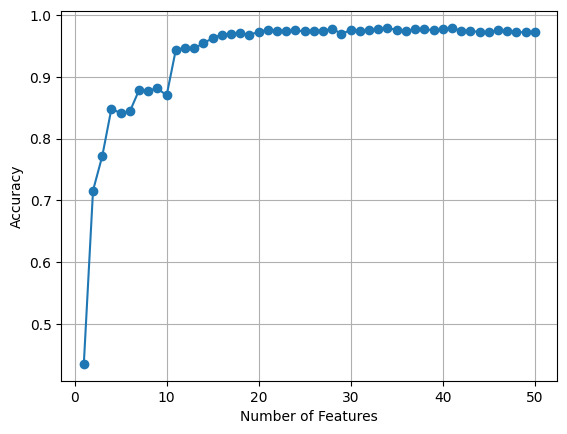

In [ ]:
plt.plot(feature_counts, accuracy_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

→ 변수 20개 정도면 충분할듯

In [ ]:
# 전체 변수
cols = feature_importances_orderby_sum['feature_name'].values[:20]
model = RandomForestClassifier(random_state=1)
model.fit(x_train[cols], y_train)
y_pred = model.predict(x_val[cols])

In [ ]:
print('accuracy :',accuracy_score(y_val, y_pred))
print('='*60)
print(confusion_matrix(y_val, y_pred))
print('='*60)
print(classification_report(y_val, y_pred))

accuracy : 0.973371104815864
[[331   0   0   0   0   0]
 [  0 288   4   0   0   0]
 [  0  11 320   0   0   0]
 [  0   0   0 287   5   5]
 [  0   0   0   5 230   4]
 [  0   0   0   7   6 262]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.96      0.99      0.97       292
          STANDING       0.99      0.97      0.98       331
           WALKING       0.96      0.97      0.96       297
WALKING_DOWNSTAIRS       0.95      0.96      0.96       239
  WALKING_UPSTAIRS       0.97      0.95      0.96       275

          accuracy                           0.97      1765
         macro avg       0.97      0.97      0.97      1765
      weighted avg       0.97      0.97      0.97      1765



### (2) 알고리즘2 : Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('accuracy :',accuracy_score(y_val, y_pred))
print('='*60)
print(confusion_matrix(y_val, y_pred))
print('='*60)
print(classification_report(y_val, y_pred))

accuracy : 0.9818696883852691
[[331   0   0   0   0   0]
 [  0 281  11   0   0   0]
 [  0  16 315   0   0   0]
 [  0   0   0 297   0   0]
 [  0   0   0   2 235   2]
 [  0   0   0   1   0 274]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.95      0.96      0.95       292
          STANDING       0.97      0.95      0.96       331
           WALKING       0.99      1.00      0.99       297
WALKING_DOWNSTAIRS       1.00      0.98      0.99       239
  WALKING_UPSTAIRS       0.99      1.00      0.99       275

          accuracy                           0.98      1765
         macro avg       0.98      0.98      0.98      1765
      weighted avg       0.98      0.98      0.98      1765



### (3) 알고리즘3 : SVC

In [ ]:
from sklearn.svm import SVC

# 매개변수 C, gamma, kernel 모두 기본값
model = SVC(C=1, gamma=0.01, kernel = 'rbf', random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

In [ ]:
print('accuracy :',accuracy_score(y_val, y_pred))
print('='*60)
print(confusion_matrix(y_val, y_pred))
print('='*60)
print(classification_report(y_val, y_pred))

accuracy : 0.9739376770538244
[[331   0   0   0   0   0]
 [  0 271  21   0   0   0]
 [  0  24 307   0   0   0]
 [  0   0   0 297   0   0]
 [  0   0   0   0 239   0]
 [  0   0   0   1   0 274]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.92      0.93      0.92       292
          STANDING       0.94      0.93      0.93       331
           WALKING       1.00      1.00      1.00       297
WALKING_DOWNSTAIRS       1.00      1.00      1.00       239
  WALKING_UPSTAIRS       1.00      1.00      1.00       275

          accuracy                           0.97      1765
         macro avg       0.98      0.98      0.98      1765
      weighted avg       0.97      0.97      0.97      1765



- 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

# 딕셔너리 형태로 관심있는 매개변수의 그리드 설정하기
param_grid = {'C': [0.01, 1, 100],
             'gamma': [0.0001, 0.001, 0.1, 1],
              'kernel': ['linear', 'rbf'] }

# 생성
# refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
model = SVC()
model= GridSearchCV (model, param_grid, return_train_score=True) #cross-validation 옵션 추가? cv=5

# 학습
# train data로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
model.fit(x_train, y_train)

# 결과
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(model.cv_results_)

In [ ]:
print('최적파라미터:', model.best_params_)
print('='*60)
print('최고성능:', model.best_score_)
print('='*60)

최적파라미터: {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
최고성능: 0.9842097346907479


In [ ]:
y_pred = model.predict(x_val)

In [ ]:
print('accuracy :',accuracy_score(y_val, y_pred))
print('='*60)
print(confusion_matrix(y_val, y_pred))
print('='*60)
print(classification_report(y_val, y_pred))

accuracy : 0.9875354107648725
[[331   0   0   0   0   0]
 [  0 286   6   0   0   0]
 [  0  16 315   0   0   0]
 [  0   0   0 297   0   0]
 [  0   0   0   0 239   0]
 [  0   0   0   0   0 275]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.95      0.98      0.96       292
          STANDING       0.98      0.95      0.97       331
           WALKING       1.00      1.00      1.00       297
WALKING_DOWNSTAIRS       1.00      1.00      1.00       239
  WALKING_UPSTAIRS       1.00      1.00      1.00       275

          accuracy                           0.99      1765
         macro avg       0.99      0.99      0.99      1765
      weighted avg       0.99      0.99      0.99      1765



### (4) 알고리즘4 : XGBoost

In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_val_le = le.transform(y_val)

model = XGBClassifier(random_state=1)
model.fit(x_train.values, y_train_le)

y_pred = model.predict(x_val)

In [ ]:
print('accuracy :',accuracy_score(y_val_le, y_pred))
print('='*60)
print(confusion_matrix(y_val_le, y_pred))
print('='*60)
print(classification_report(y_val_le, y_pred))

accuracy : 0.9932011331444759
[[331   0   0   0   0   0]
 [  0 288   4   0   0   0]
 [  0   5 326   0   0   0]
 [  0   0   0 296   1   0]
 [  0   0   0   1 237   1]
 [  0   0   0   0   0 275]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       0.98      0.99      0.98       292
           2       0.99      0.98      0.99       331
           3       1.00      1.00      1.00       297
           4       1.00      0.99      0.99       239
           5       1.00      1.00      1.00       275

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



### (5) 알고리즘5 : LightGBM

In [ ]:
#!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=1, verbose=-1)
model.fit(x_train.values, y_train.values)

y_pred = model.predict(x_val)

In [ ]:
print('accuracy :',accuracy_score(y_val, y_pred))
print('='*60)
print(confusion_matrix(y_val, y_pred))
print('='*60)
print(classification_report(y_val, y_pred))

accuracy : 0.9926345609065156
[[331   0   0   0   0   0]
 [  0 287   5   0   0   0]
 [  0   6 325   0   0   0]
 [  0   0   0 296   1   0]
 [  0   0   0   0 238   1]
 [  0   0   0   0   0 275]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       331
           SITTING       0.98      0.98      0.98       292
          STANDING       0.98      0.98      0.98       331
           WALKING       1.00      1.00      1.00       297
WALKING_DOWNSTAIRS       1.00      1.00      1.00       239
  WALKING_UPSTAIRS       1.00      1.00      1.00       275

          accuracy                           0.99      1765
         macro avg       0.99      0.99      0.99      1765
      weighted avg       0.99      0.99      0.99      1765



- 랜덤포레스트 0.97507
- 로지스틱 회귀 0.981869
- SVC 0.9842097
- XGBoost 0.993201
- LightGBM 0.992634

### (5) 알고리즘5 : AUTO ML

In [ ]:
!pip install pycaret

In [ ]:
import pycaret

In [ ]:
from pycaret.classification import ClassificationExperiment
exp_clf = ClassificationExperiment()
exp_clf.setup(data, target = 'Activity', session_id = 1)

In [ ]:
best_model = exp_clf.compare_models()

In [ ]:
print(best_model)

In [ ]:
exp_clf.evaluate_model(best_model)

In [ ]:
exp_clf.plot_model(best_model, plot='confusion_matrix')

In [ ]:
exp_clf.plot_model(best_model, plot='feature')